**Algoritmos de Clasificación 2 - Random Forest - LoL e-sports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
url_teams = 'https://raw.githubusercontent.com/cporras/lol-esports/main/Data/df_teams.csv'
df = pd.read_csv(url_teams)

In [3]:
#El arbol de decisión lo implementaremos usando las estadisticas obtenidas al minuto 15 de una partida,
#de esta manera entrenaremos un modelo con el objetivo de predecir el resultado de un juego al minuto 15

#Los datos que entran son resultado, primer asesinato, primer dragon, primer heraldo, primera torre, y oro, experiencia, cs y asesinatos al minuto 15
features = ['result','firstblood','firstdragon','firstherald','firsttower','goldat15','xpat15','csat15','golddiffat15','xpdiffat15','csdiffat15','killsat15','assistsat15','deathsat15']
df_feat =  df[features]
df_feat.head()

,result,firstblood,firstdragon,firstherald,firsttower,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15
0,0,1.0,1.0,1.0,1.0,24815.0,31121.0,608.0,951.0,-107.0,18.0,1.0,1.0,0.0
1,1,0.0,0.0,0.0,0.0,23864.0,31228.0,590.0,-951.0,107.0,-18.0,0.0,0.0,1.0
2,0,0.0,0.0,1.0,1.0,27355.0,32158.0,560.0,2145.0,-420.0,44.0,5.0,6.0,6.0
3,1,1.0,1.0,0.0,0.0,25210.0,32578.0,516.0,-2145.0,420.0,-44.0,6.0,9.0,5.0
4,0,1.0,1.0,1.0,0.0,24131.0,29284.0,527.0,-457.0,-1218.0,-16.0,2.0,3.0,3.0


In [4]:
df_feat.shape

(682, 14)

In [5]:
df_feat.dtypes

result            int64
firstblood      float64
firstdragon     float64
firstherald     float64
firsttower      float64
goldat15        float64
xpat15          float64
csat15          float64
golddiffat15    float64
xpdiffat15      float64
csdiffat15      float64
killsat15       float64
assistsat15     float64
deathsat15      float64
dtype: object

In [ ]:
df_feat.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [7]:
#Separamos los datos de entrada de la salida
X = df_feat.drop('result', axis=1) #Elimino de mi dataset la variable a predecir
y = df_feat.result #Defino el Target

In [8]:
#Separación del dataset, 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [41]:
model = RandomForestClassifier(random_state=42, n_estimators=100,
                               class_weight="balanced",max_depth=8)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [42]:
y_train_pred = model.predict(X_train) #Prediccion en Train
y_test_pred = model.predict(X_test) #Prediccion en Test

In [43]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)
#Para este dataset el accuracy del random forest y el arbol de decisión es similar

% de aciertos sobre el set de entrenamiento: 0.9810126582278481
% de aciertos sobre el set de evaluación: 0.75


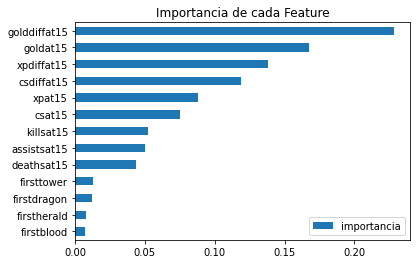

In [44]:
importances = model.feature_importances_
imp = pd.DataFrame(importances,index=X.columns,columns=['importancia']).sort_values(by='importancia')
imp.plot(kind='barh')
plt.title('Importancia de cada Feature')
plt.show()